# StockX Data Inspection

<a target="_blank" href="https://colab.research.google.com/github/Davideck123/stockx-data-inspection/blob/master/stockx_data_inspection.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## What is StockX?

[StockX](https://stockx.com/) is an online marketplace and clothing reseller, primarily of sneakers... facilitating auctions between sellers and buyers, 
then collecting transaction and payment fees. Sellers send purchased items to StockX facilities for inspection and verification, then authenticated products are shipped to buyers. StockX features a "stock market-like" variable pricing framework and discloses price histories for specific items. StockX is most known for sneakers and streetwear but also carries other clothing and accessories such as handbags and watches... 
[Wikipedia](https://en.wikipedia.org/wiki/StockX)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors, patches
import geopandas as gpd
#import seaborn as sns
#sns.set_theme()

The data is from the [2019 StockX data contest](https://stockx.com/news/the-2019-data-contest/)
and you can get it at kaggle in csv [here](https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest).

In [2]:
data = pd.read_csv('data/StockX-Data-Contest-2019-3.csv')
data

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$565,$220,12/26/18,8.0,Oregon
99952,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$598,$220,12/26/18,8.5,California
99953,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$605,$220,12/26/18,5.5,New York
99954,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$650,$220,12/26/18,11.0,California


Clean up and prepare the data

In [3]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Release Date'] = pd.to_datetime(data['Release Date'])

# remove $ and ,
data['Sale Price'] = pd.to_numeric(data['Sale Price'].str[1:].str.replace(',', ''))
data['Retail Price'] = pd.to_numeric(data['Retail Price'].str[1:])

# change ' Yeezy' to 'Yeezy'
data.loc[data.Brand == ' Yeezy', 'Brand'] = 'Yeezy'

data['days_since_release'] = (data['Order Date'] - data['Release Date']).dt.days
data['profit'] = data['Sale Price'] - data['Retail Price']
data['profit (%)'] = data['profit'] / data['Retail Price'] * 100

data['weeks_since_release'] = data['Order Date'].dt.to_period('W').astype(int) - data['Release Date'].dt.to_period('W').astype(int)
data['months_since_release'] = data['Order Date'].dt.to_period('M').astype(int) - data['Release Date'].dt.to_period('M').astype(int)

data

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,days_since_release,profit,profit (%),weeks_since_release,months_since_release
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,342,877,398.636364,49,12
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,282,465,211.363636,40,10
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,282,470,213.636364,40,10
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,282,855,388.636364,40,10
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,202,608,276.363636,29,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565,220,2018-12-26,8.0,Oregon,49,345,156.818182,7,2
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598,220,2018-12-26,8.5,California,49,378,171.818182,7,2
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605,220,2018-12-26,5.5,New York,49,385,175.000000,7,2
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650,220,2018-12-26,11.0,California,49,430,195.454545,7,2


## When is the ideal time to sell? / How long should you hold on to your item?


In [4]:
group_by_days_since_release = data.groupby('days_since_release')[['profit', 'profit (%)']].aggregate(['mean', 'count'])
group_by_days_since_release

profit       profit (%)      
                      mean count       mean count
days_since_release                               
-69                 1340.0     1      837.5     1
-64                 1340.0     1      837.5     1
-59                  575.0     1      230.0     1
-58                  650.0     1      260.0     1
-57                  880.0     2      491.5     2
...                    ...   ...        ...   ...
 1271               1045.0     1      522.5     1
 1278               1250.0     1      625.0     1
 1304                950.0     1      475.0     1
 1310               1150.0     1      575.0     1
 1321               1100.0     1      550.0     1

[1161 rows x 4 columns]

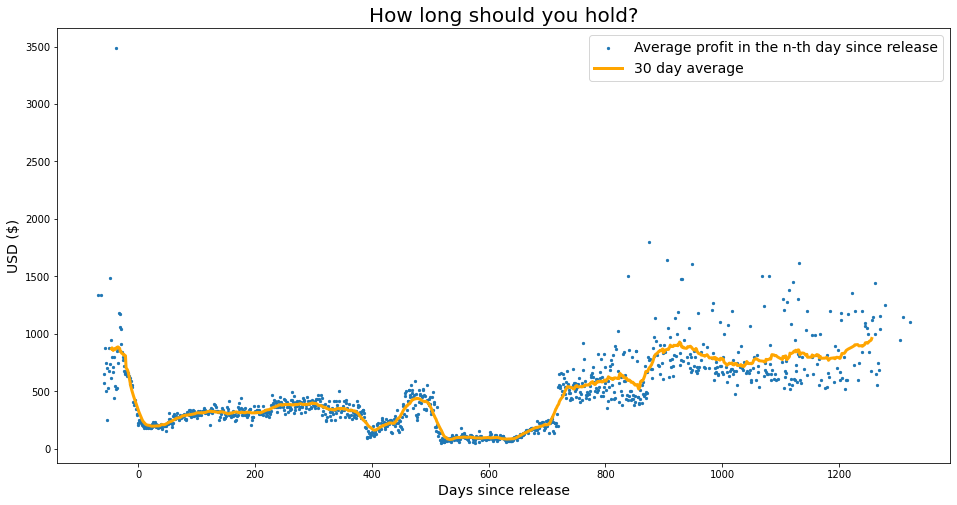

In [5]:
plt.figure(figsize=(16, 8))
plt.scatter(group_by_days_since_release.index, group_by_days_since_release['profit', 'mean'], s=5, label='Average profit in the n-th day since release')
plt.plot(group_by_days_since_release['profit', 'mean'].rolling(30,center=True,closed='both').mean(), linewidth=3, c='orange', label='30 day average')
plt.xlabel('Days since release', fontsize=14)
plt.ylabel('USD ($)', fontsize=14)
plt.title('How long should you hold?', fontsize=20)
plt.legend(fontsize=14)
plt.show()

We do the same calculation with percantage gain instead of the plain profit to confirm the previous graph is correct.

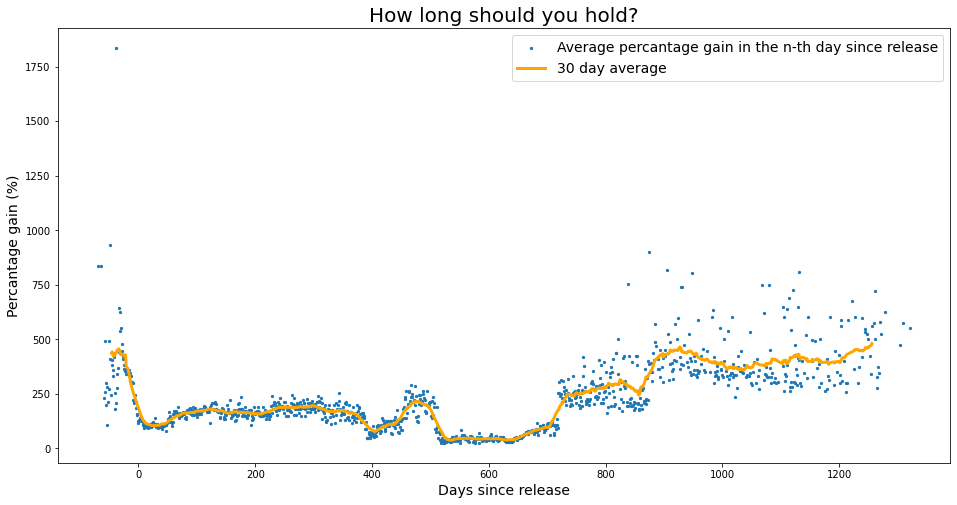

In [6]:
plt.figure(figsize=(16, 8))
plt.scatter(group_by_days_since_release.index, group_by_days_since_release['profit (%)', 'mean'], s=5, label='Average percantage gain in the n-th day since release')
plt.plot(group_by_days_since_release['profit (%)', 'mean'].rolling(30, center=True, closed='both').mean(), linewidth=3, c='orange', label='30 day average')
plt.xlabel('Days since release', fontsize=14)
plt.ylabel('Percantage gain (%)', fontsize=14)
plt.title('How long should you hold?', fontsize=20)
plt.legend(fontsize=14)
plt.show()

In [7]:
data[['profit', 'profit (%)']].corr()

,profit,profit (%)
profit,1.000000,0.979373
profit (%),0.979373,1.000000


From the graph and the correlation matrix, we see that we can use the plain profit because it correlates with the percentage gain.

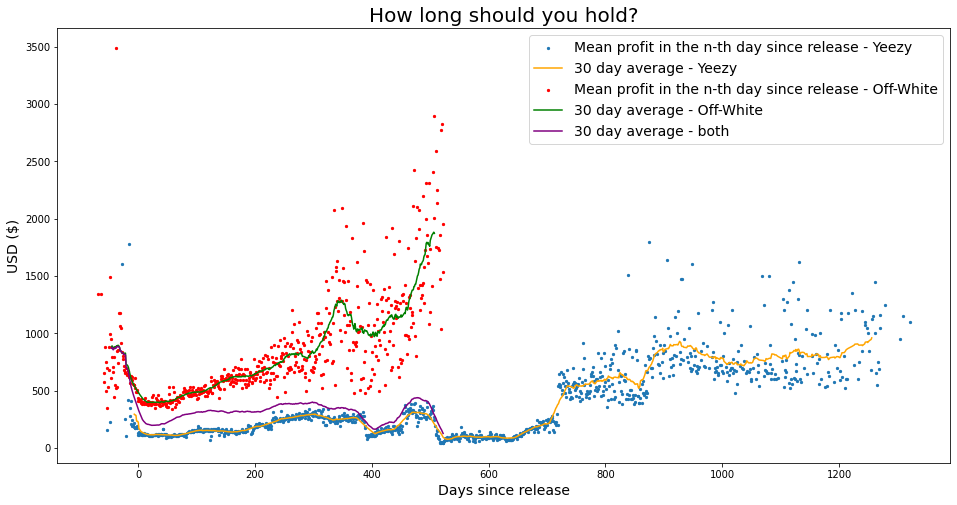

In [8]:
gr = data.groupby(['Brand', 'days_since_release'])[['profit', 'profit (%)']].agg(['mean', 'count'])
yeezy = gr.loc['Yeezy', 'profit']
offwhite = gr.loc['Off-White', 'profit']

plt.figure(figsize=(16, 8))
plt.scatter(yeezy.index, yeezy['mean'], s=5, label='Mean profit in the n-th day since release - Yeezy')
plt.plot(yeezy['mean'].rolling(30, center=True, closed='both').mean(), c='orange', label='30 day average - Yeezy')
plt.scatter(offwhite.index, offwhite['mean'], s=5, c='red', label='Mean profit in the n-th day since release - Off-White')
plt.plot(offwhite['mean'].rolling(30, center=True, closed='both').mean(), c='green', label='30 day average - Off-White')
plt.xlabel('Days since release', fontsize=14)
plt.ylabel('USD ($)', fontsize=14)
plt.title('How long should you hold?', fontsize=20)

plt.plot(group_by_days_since_release['profit', 'mean'].rolling(30, center=True, closed='both').mean()[offwhite.index], c='purple', label='30 day average - both')

plt.legend(fontsize=14)
plt.show()

Generally speaking, we can say that the mean profit is going up over time. However, it's quite volatile - the time since release is just one of many factors affecting the price. If you can somehow get your hands on the sneakers before the release date, it's good idea to sell them - the sooner the better. Otherwise, you should wait for at least a few months and even then you might have to wait for additional time if the price is currently down.

In [9]:
group_by_days_since_release['profit'].iloc[:, :-1].reset_index().rename(columns={'mean': 'mean_profit'}).corr()

,days_since_release,mean_profit
days_since_release,1.000000,0.458057
mean_profit,0.458057,1.000000


In [10]:
# exclude sales before the release date

after_release = group_by_days_since_release['profit'].iloc[:, :-1].reset_index().rename(columns={'mean': 'mean_profit'})
after_release = after_release[after_release.days_since_release >= 0]
after_release.corr()

,days_since_release,mean_profit
days_since_release,1.000000,0.641763
mean_profit,0.641763,1.000000


## Do sneakers with a lower retail price have higher profits?

From my experience, this is something that can be often true - let's see if the data confirms it.

In [11]:
groupby_retail_price = data.groupby(['Retail Price', 'Brand'])['profit'].agg(['mean', 'count'])
groupby_retail_price

mean  count
Retail Price Brand                       
130          Off-White  472.877968   3622
150          Off-White  825.516129     31
160          Off-White  547.012262   6361
170          Off-White  235.772436   5471
190          Off-White  776.638478   7095
200          Off-White  167.978711   1785
             Yeezy      854.375824    455
220          Yeezy      135.626759  71707
250          Off-White  396.502770   3429

In [12]:
yeezy = groupby_retail_price.loc[pd.IndexSlice[:, 'Yeezy', :]]
yeezy

,mean,count
Retail Price,,
200,854.375824,455
220,135.626759,71707


In [13]:
offwhite = groupby_retail_price.loc[pd.IndexSlice[:, 'Off-White', :]]
offwhite

,mean,count
Retail Price,,
130,472.877968,3622
150,825.516129,31
160,547.012262,6361
170,235.772436,5471
190,776.638478,7095
200,167.978711,1785
250,396.502770,3429


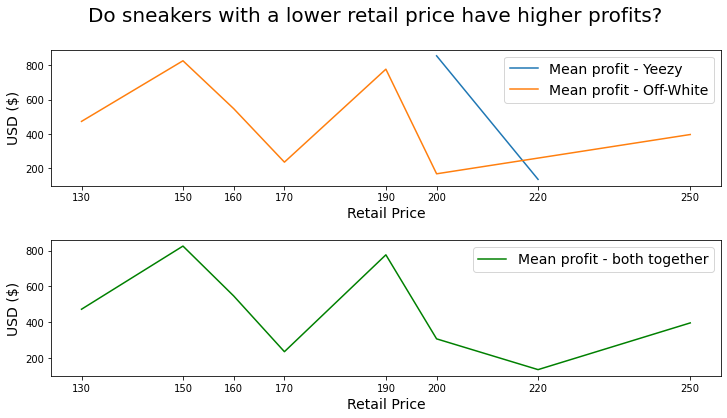

In [14]:
groupby_retail_price = data.groupby(['Retail Price'])['profit'].agg(['mean', 'count'])

plt.subplots(2, 1, figsize=(12, 6))
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Do sneakers with a lower retail price have higher profits?', fontsize=20)

plt.subplot(211)
plt.plot(yeezy.index, yeezy['mean'], label='Mean profit - Yeezy')
plt.plot(offwhite.index, offwhite['mean'], label='Mean profit - Off-White')
plt.xticks(groupby_retail_price.index)
plt.xlabel('Retail Price', fontsize=14)
plt.ylabel('USD ($)', fontsize=14)
plt.legend(fontsize=14)

plt.subplot(212)
plt.plot(groupby_retail_price.index, groupby_retail_price['mean'], c='green', label='Mean profit - both together')
plt.xticks(groupby_retail_price.index)
plt.xlabel('Retail Price', fontsize=14)
plt.ylabel('USD ($)', fontsize=14)
plt.legend(fontsize=14)
plt.show()

Well, the data doesn't really prove my point, even though the downward trend is there. Again, the retail price is obviously just one piece of the puzzle. The final price and therefore the profit depends on a lot of other stuff too.

In [15]:
groupby_retail_price['mean'].reset_index().rename(columns={'mean': 'mean_profit'}).corr()

,Retail Price,mean_profit
Retail Price,1.000000,-0.420891
mean_profit,-0.420891,1.000000


## Are certain sizes more profitable than the others?

This is definitely true for a specific model and colorway, but can we say that about some sizes in general?

In [16]:
group_by_size = data.groupby('Shoe Size')['profit'].agg(['mean', 'count'])
yeezy_group_by_size = data[data['Brand'] == 'Yeezy'].groupby('Shoe Size')['profit'].agg(['mean', 'count'])
offwhite_group_by_size = data[data['Brand'] == 'Off-White'].groupby('Shoe Size')['profit'].agg(['mean', 'count'])

group_by_size

,mean,count
Shoe Size,,
3.5,261.250000,4
4.0,170.933512,2241
4.5,181.047546,1304
5.0,171.681018,3577
5.5,157.362076,2621
6.0,203.770496,4013
6.5,212.735016,2219
7.0,217.358417,3867
7.5,217.421547,2664


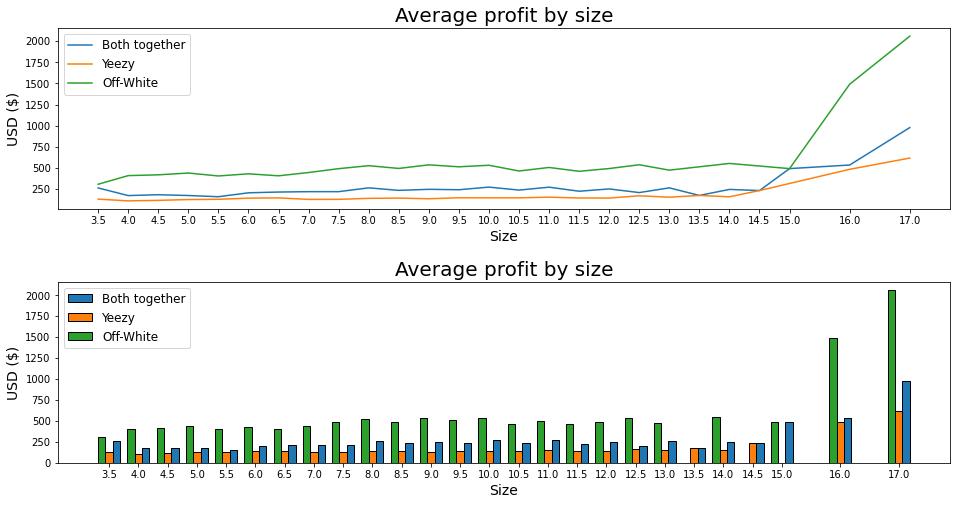

In [17]:
plt.subplots(2, 1, figsize=(16, 8))
plt.subplots_adjust(hspace=0.4)

plt.subplot(211)
plt.plot(group_by_size.index, group_by_size['mean'], label='Both together')
plt.plot(yeezy_group_by_size.index, yeezy_group_by_size['mean'], label='Yeezy')
plt.plot(offwhite_group_by_size.index, offwhite_group_by_size['mean'], label='Off-White')

plt.xticks(ticks=group_by_size.index)
plt.xlabel('Size', fontsize=14)
plt.ylabel('USD ($)', fontsize=14)
plt.legend(fontsize=12)
plt.title('Average profit by size', fontsize=20)


plt.subplot(212)
plt.bar(group_by_size.index * 4 + 0.5, group_by_size['mean'], edgecolor='black', width=0.5, label='Both together')
plt.bar(yeezy_group_by_size.index * 4, yeezy_group_by_size['mean'], edgecolor='black', width=0.5, label='Yeezy')
plt.bar(offwhite_group_by_size.index * 4 - 0.5, offwhite_group_by_size['mean'], edgecolor='black', width=0.5, label='Off-White')

plt.xticks(ticks=group_by_size.index * 4, labels=group_by_size.index)
plt.xlabel('Size', fontsize=14)
plt.ylabel('USD ($)', fontsize=14)
plt.legend(fontsize=12)
plt.title('Average profit by size', fontsize=20)
plt.show()

This time we only include sizes with at least 100+ sales in order to remove outliers.

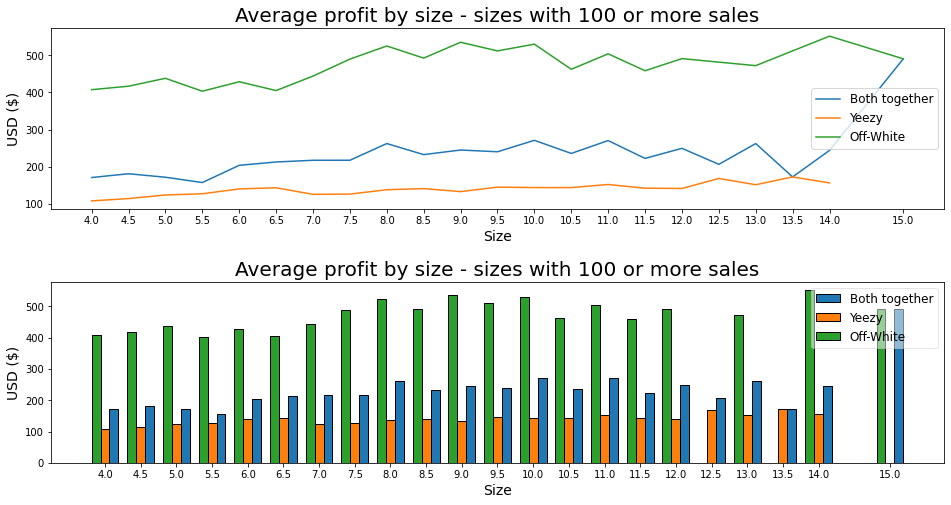

In [18]:
group_by_size = group_by_size[group_by_size['count'] >= 100]
yeezy_group_by_size = yeezy_group_by_size[yeezy_group_by_size['count'] >= 100]
offwhite_group_by_size = offwhite_group_by_size[offwhite_group_by_size['count'] >= 100]

plt.subplots(2, 1, figsize=(16, 8))
plt.subplots_adjust(hspace=0.4)

plt.subplot(211)
plt.plot(group_by_size.index, group_by_size['mean'], label='Both together')
plt.plot(yeezy_group_by_size.index, yeezy_group_by_size['mean'], label='Yeezy')
plt.plot(offwhite_group_by_size.index, offwhite_group_by_size['mean'], label='Off-White')

plt.xticks(ticks=group_by_size.index)
plt.xlabel('Size', fontsize=14)
plt.ylabel('USD ($)', fontsize=14)
plt.legend(fontsize=12)
plt.title('Average profit by size - sizes with 100 or more sales', fontsize=20)


plt.subplot(212)
plt.bar(group_by_size.index * 4, group_by_size['mean'], edgecolor='black', width=0.5, label='Both together')
plt.bar(yeezy_group_by_size.index * 4 - 0.5, yeezy_group_by_size['mean'], edgecolor='black', width=0.5, label='Yeezy')
plt.bar(offwhite_group_by_size.index * 4 - 1, offwhite_group_by_size['mean'], edgecolor='black', width=0.5, label='Off-White')

plt.xticks(ticks=group_by_size.index * 4 - 0.5, labels=group_by_size.index)
plt.xlabel('Size', fontsize=14)
plt.ylabel('USD ($)', fontsize=14)
plt.legend(fontsize=12, framealpha=0.5)
plt.title('Average profit by size - sizes with 100 or more sales', fontsize=20)
plt.show()

The data shows an upward trend, which is a little bit surprising to me. I would expect the average profit to be more similar for all sizes. But I think the data is not diverse enough. We would need more data to really decide how it is.

In [19]:
group_by_size['mean'].reset_index().rename(columns={'mean': 'mean_profit'}).corr()

,Shoe Size,mean_profit
Shoe Size,1.000000,0.587824
mean_profit,0.587824,1.000000


In [20]:
yeezy_group_by_size['mean'].reset_index().rename(columns={'mean': 'mean_profit'}).corr()

,Shoe Size,mean_profit
Shoe Size,1.000000,0.859478
mean_profit,0.859478,1.000000


In [21]:
offwhite_group_by_size['mean'].reset_index().rename(columns={'mean': 'mean_profit'}).corr()

,Shoe Size,mean_profit
Shoe Size,1.000000,0.660643
mean_profit,0.660643,1.000000


## Which states have the highest amount of received orders? Where do people buy sneakers the most?

In [22]:
shape = gpd.read_file('data/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')[['NAME', 'geometry']].rename(columns={'NAME': 'State'})
shape = shape[~shape['State'].isin([
    'Alaska', 'Hawaii', 'American Samoa', 'United States Virgin Islands', 'Guam', 'Commonwealth of the Northern Mariana Islands', 'Puerto Rico'
])]
shape.head()

,State,geometry
0,Mississippi,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,North Carolina,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,Oklahoma,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,Virginia,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,West Virginia,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [23]:
buyer_region_counts = data.groupby('Buyer Region')['Buyer Region'].count().reset_index(name='count').rename(columns={'Buyer Region': 'State', 'count': 'Sale_count'})

buyer_region_counts = pd.merge(shape, buyer_region_counts, on='State', how='left')
top5 = buyer_region_counts.sort_values(by='Sale_count', ascending=False)[['State', 'Sale_count']][:5]
top5

,State,Sale_count
15,California,19349
24,New York,16525
43,Oregon,7681
9,Florida,6376
14,Texas,5876


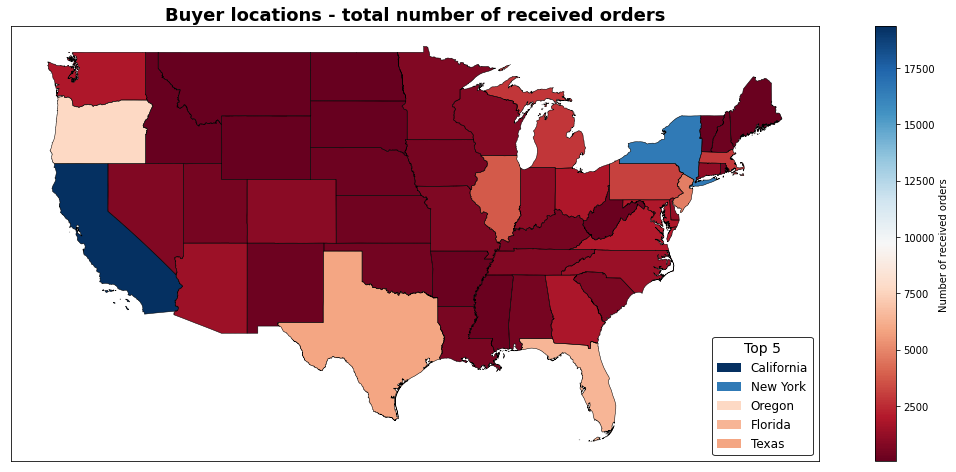

In [24]:
vmin = buyer_region_counts['Sale_count'].min()
vmax = buyer_region_counts['Sale_count'].max()

ax = buyer_region_counts.boundary.plot(figsize=(20, 8), edgecolor='black', linewidth=0.5)
buyer_region_counts.plot(ax=ax, column='Sale_count', legend=True, cmap='RdBu', vmin=vmin, vmax=vmax, legend_kwds={'label': 'Number of received orders'})
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Buyer locations - total number of received orders', size=18, weight='bold')

### Top 5 legend ###
cmap = cm.get_cmap('RdBu')
norm = colors.Normalize(vmin=vmin, vmax=vmax)
pmarks = []
for name, count in top5.values:
    pmarks.append(patches.Patch(facecolor=cmap(norm(count)), label=name))

handles, _ = ax.get_legend_handles_labels()
ax.legend(title='Top 5', title_fontsize=14, handles=[*handles, *pmarks], loc='lower right', fontsize=12, edgecolor='black')
###

plt.show()

California, New York, Florida and Texas are no surprise, because these are in the top 4 most populated states (2021). However, Oregon, the 27th most populated state (2021), at the 3rd place is very interesting. I suppose it's because the brand Nike was founded and has headquarters in Oregon and therefore is popular there and therefore people in Oregon are more into sneakers and streetwear.

### Conclusion

Even though the data contains almost 100k orders, there are only adidas Yeezys and Nike x Off-White colaboration, so the data is definitely not completely diverse. These sneakers were really demanded at the time and therefore the profits are higher than average. The data cannot represent the whole sneaker market.